In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

## С чего начать? 

In [2]:
# https://www.kaggle.com/c/liberty-mutual-group-property-inspection-prediction
target = pd.read_csv('liberty.csv').Hazard

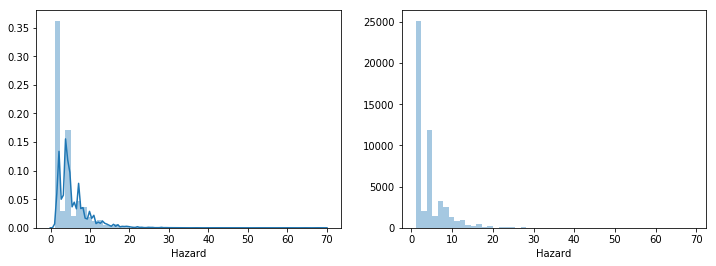

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.distplot(target, ax=axes[0])
sns.distplot(target, kde=False, ax=axes[1])

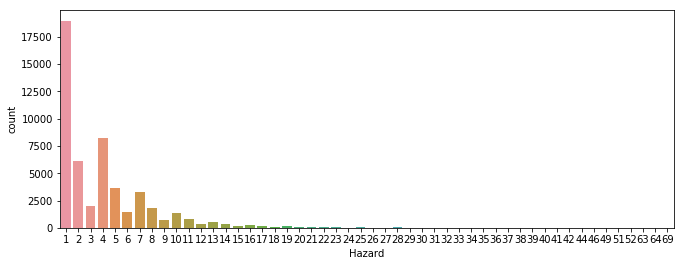

In [4]:
plt.figure(figsize=(11, 4))
sns.countplot(target)

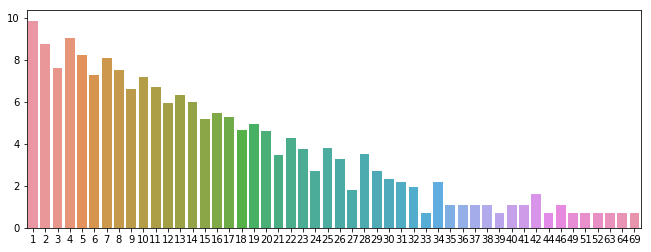

In [5]:
plt.figure(figsize=(11, 4))
vc = target.value_counts()
sns.barplot(vc.index, np.log1p(vc.values))

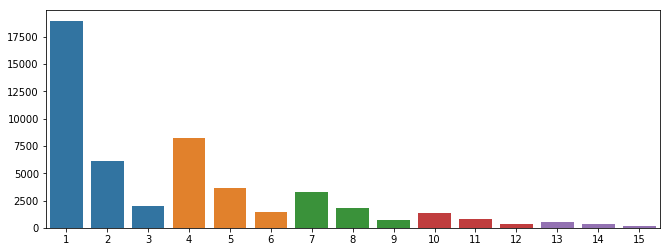

In [6]:
plt.figure(figsize=(11, 4))
vc_sample = vc[vc.index <= 15]
color_groups = (vc_sample.sort_index().index - 1) // 3 
palette = sns.color_palette()
sns.barplot(vc_sample.index, vc_sample.values,
            palette=[palette[i] for i in color_groups])

### Что дальше?

In [175]:
df = pd.read_csv('pokemon.csv', index_col=0)

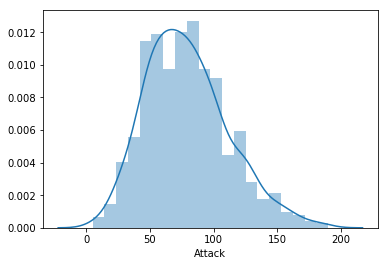

In [176]:
sns.distplot(df.Attack)

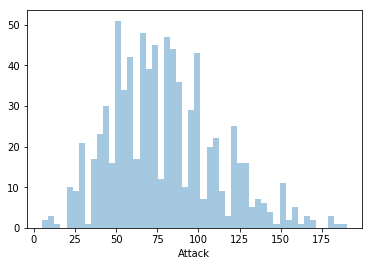

In [180]:
sns.distplot(df.Attack, bins=50, kde=False)

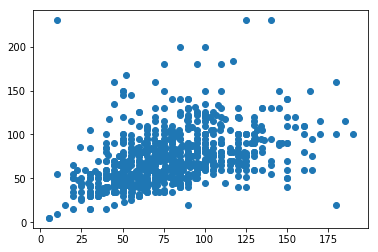

In [89]:
plt.scatter(df.Attack, df.Defense)

In [121]:
df['Type 1'].value_counts().head(10)

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ground       32
Ghost        32
Name: Type 1, dtype: int64

In [138]:
top_types = ['Water', 'Normal']

palette = sns.color_palette()
df_top = df[df['Type 1'].isin(top_types)]
enc = LabelEncoder()
poke_types_index = enc.fit_transform(df_top['Type 1'])

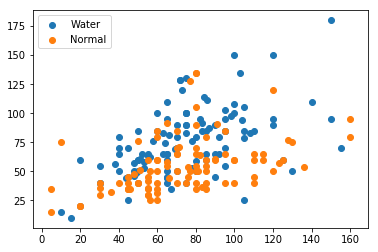

In [145]:
for i, x in enumerate(top_types):
    index = df['Type 1'] == x
    plt.scatter(df_top.loc[index, 'Attack'],
                df_top.loc[index, 'Sp. Atk'],
                c=palette[i],
                label=x)
plt.legend()

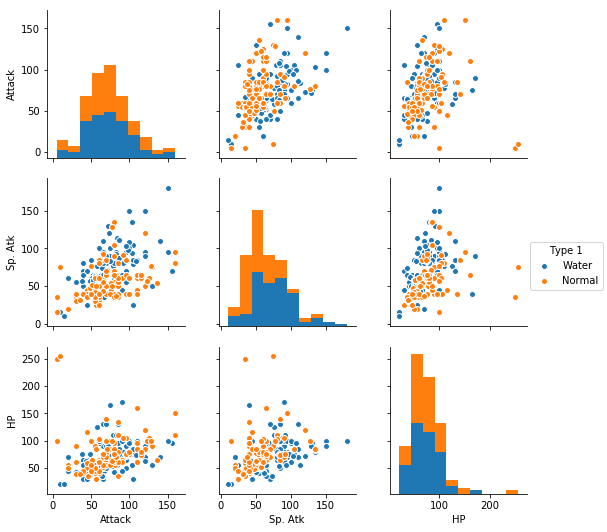

In [151]:
sns.pairplot(df_top[['Type 1', 'Attack', 'Sp. Atk', 'HP']], hue='Type 1')

## Распределения по группам

In [165]:
from sklearn.datasets import load_iris

In [168]:
iris = pd.read_csv("Iris.csv")

In [170]:
iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


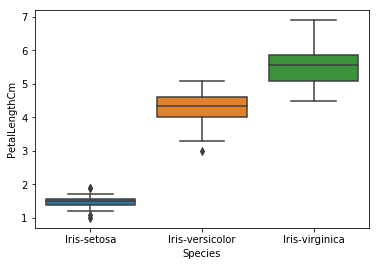

In [169]:
sns.boxplot(x="Species", y="PetalLengthCm", data=iris)

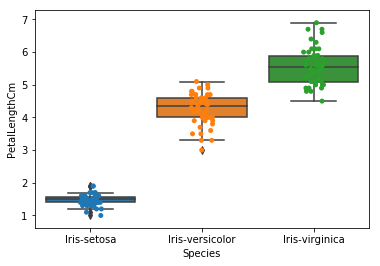

In [171]:
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray")

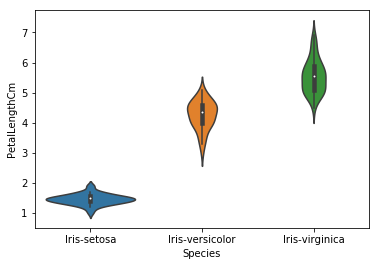

In [172]:
sns.violinplot(x="Species", y="PetalLengthCm", data=iris, size=6)

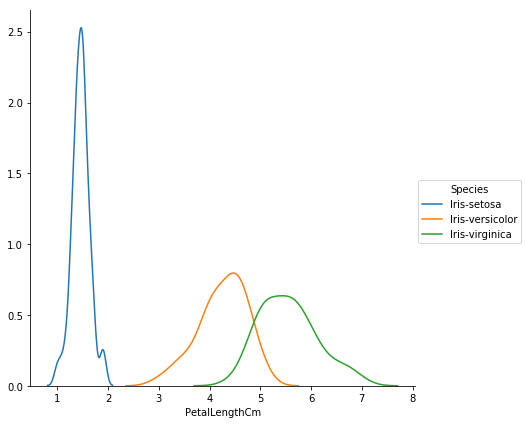

In [173]:
sns.FacetGrid(iris, hue="Species", size=6) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

## Время

In [181]:
#https://www.kaggle.com/headsortails/be-my-guest-recruit-restaurant-eda


In [183]:
df = pd.read_csv('air_reserve.csv')
df['reserve_datetime'] = pd.to_datetime(df.reserve_datetime)
df['visit_datetime'] = pd.to_datetime(df.visit_datetime)

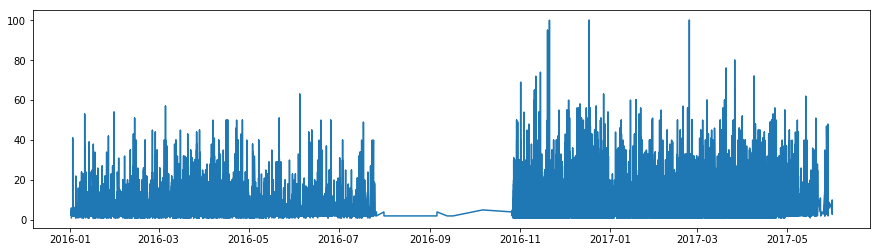

In [189]:
plt.figure(figsize=(15, 4))
plt.plot(df.visit_datetime, df.reserve_visitors)

In [203]:
df['visit_date'] = df.visit_datetime.dt.date

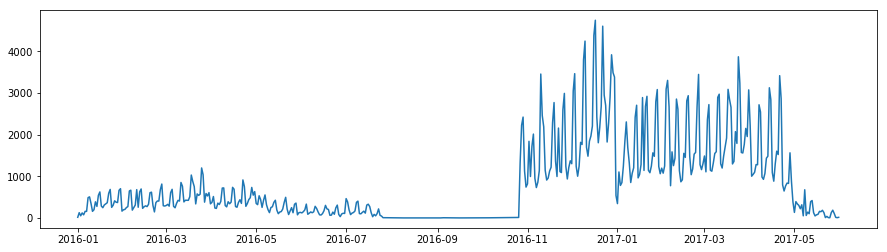

In [207]:
dfdate = df.groupby('visit_date', as_index=False).reserve_visitors.sum()
plt.figure(figsize=(15, 4))
plt.plot(dfdate.visit_date, dfdate.reserve_visitors)

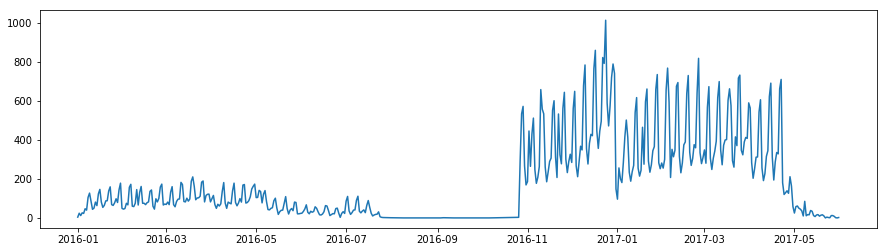

In [211]:
dfdate = df.groupby('visit_date', as_index=False).reserve_visitors.count()
plt.figure(figsize=(15, 4))
plt.plot(dfdate.visit_date, dfdate.reserve_visitors)

## Train/test распределение (втч по таргету)
1. Просто распредление train/test
2. Распределениея по таргету в train
3. Предсказания на cv и предсказания на test
4. Предсказания различных алгоритмов на test да и на test

и если есть время, то посмотрите, как это меняется во времени)
И если есть время, то как разбивать на train/test. CV - плохой вариант

In [216]:
# 2sigma
train = pd.read_json('train.json')
test = pd.read_json('test.json')
target_col = 'interest_level'

In [228]:
base_features = ['bathrooms', 'bedrooms', 'price']

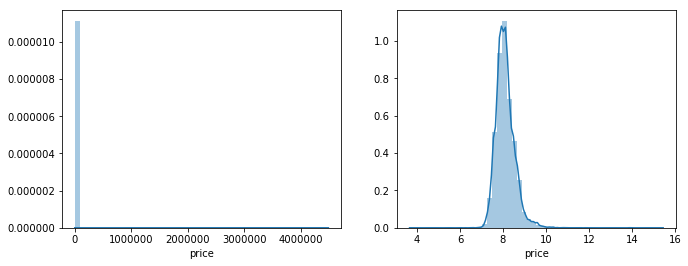

In [235]:
fig, axes = plt.subplots(1, 2, figsize=(11, 4))
sns.distplot(train.price, ax=axes[0])
sns.distplot(np.log1p(train.price), ax=axes[1])

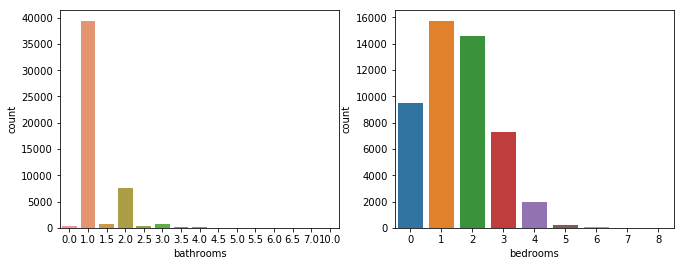

In [236]:
fig, axes = plt.subplots(1, 2, figsize=(11, 4))
sns.countplot(train.bathrooms, ax=axes[0])
sns.countplot(train.bedrooms, ax=axes[1])

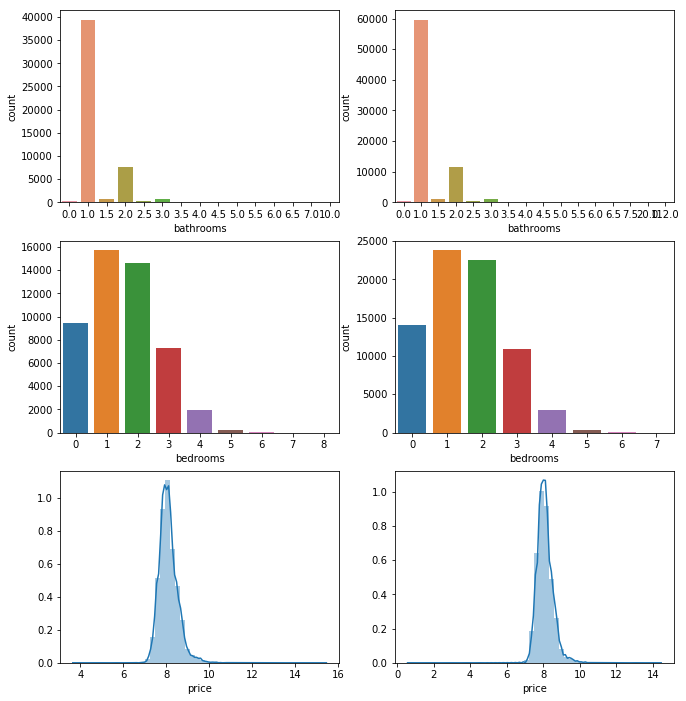

In [239]:
base_features = ['bathrooms', 'bedrooms', 'price']
log_features = ['price']

fig, axes = plt.subplots(len(base_features), 2, 
                         figsize=(11, 4 * len(base_features)))

for ax_row, feature in zip(axes, base_features):
    if feature in log_features:
        sns.distplot(np.log1p(train[feature]), ax=ax_row[0])
        sns.distplot(np.log1p(test[feature]), ax=ax_row[1])
    else:
        sns.countplot(train[feature], ax=ax_row[0])
        sns.countplot(test[feature], ax=ax_row[1])


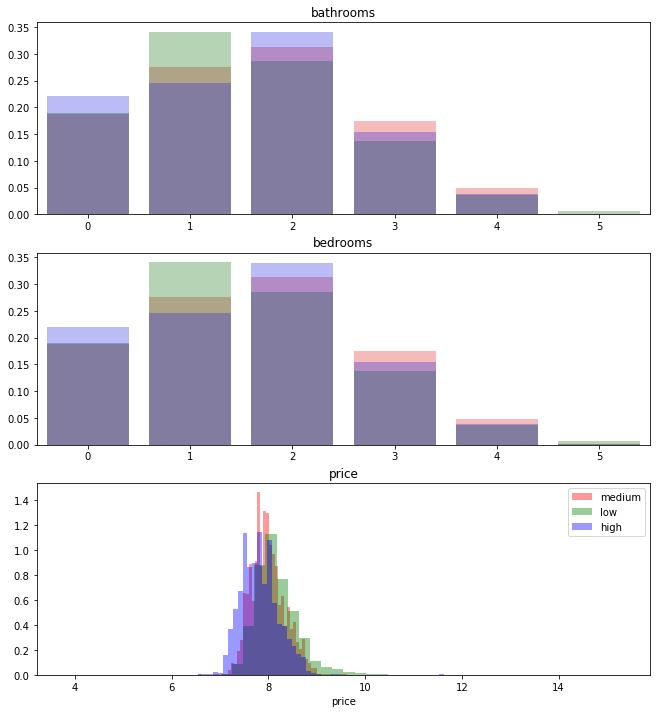

In [261]:
target_unique = train[target_col].unique()
fig, axes = plt.subplots(len(base_features), 1, 
                         figsize=(11, 4 * len(base_features)))

colors = ['r', 'g', 'b']
for ax, feature in zip(axes, base_features):
    for c, targ in zip(colors, target_unique):
        index = train[target_col] == targ
        if feature in log_features:
            sns.distplot(np.log1p(train.loc[index, feature]), color=c,
                         ax=ax, kde=False, norm_hist=True, label=targ)
            
        else:
            vc = train.loc[index, 'bedrooms'].value_counts() / train[index].shape[0]
            sns.barplot(vc.index, vc.values, ax=ax, color=c, alpha=0.3, label=targ)
#             sns.countplot(train.loc[index, feature], color=c, ax=ax, alpha=0.3)
        ax.set_title(feature)

plt.legend()

### разобрать https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

https://alexanderdyakonov.files.wordpress.com/2016/10/dj2016_sdsj_vis.pdf